<a href="https://colab.research.google.com/github/jisusP/Articulo/blob/main/tanimoto_article2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys

url= "https://raw.githubusercontent.com/jisusP/Articulo/main/SMILES.csv"
sm=pd.read_csv(url)

In [ ]:
!pip install rdkit

In [11]:
smile_alone = sm.loc[:,"smiles"]
mkeys = []
def tanimoto(s):
  mol = Chem.MolFromSmiles(s)
  mkeys = MACCSkeys.GenMACCSKeys(mol)
  return mkeys
for i in smile_alone:
  mkeys.append(tanimoto(i))
sm = sm.assign(Mkeys=mkeys)

In [ ]:
cont=0 
Contador=[]
Tan_sum=[]

for k in sm['Mkeys']:
  for i in sm['Mkeys']:
    a= tf.reduce_sum(k+i).numpy()
    Tan_sum.append(a)
    for (z1,z2) in zip(k, i):
      if (z1 == z2 == 1):
        cont+=1
      else:
        pass
    Contador.append(cont)
    cont = 0    

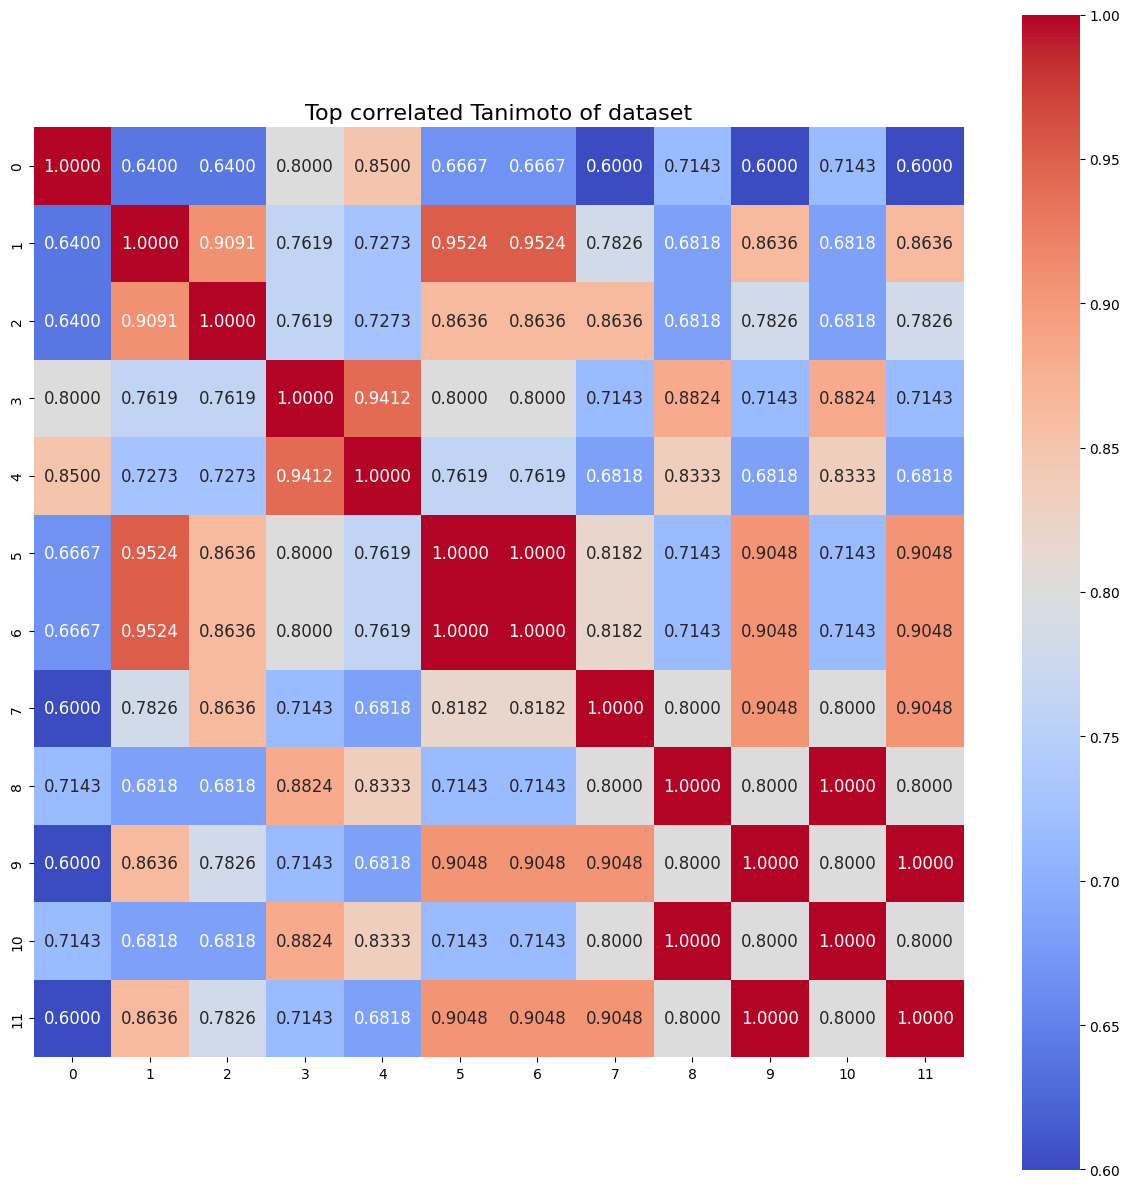

In [63]:
Itan=[]
for item1, item2 in zip(Tan_sum, Contador):
  Itan.append(item2/(item1-item2))

x = 12
dividir_array= lambda Tan, x: [Tan[i:i+x] for i in range(0, len(Tan), x)]
data=dividir_array(Itan, x)
df_tan=pd.DataFrame(data)
df_tan.corr()

#Matriz heatMap de tanimoto

corr = df_tan.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_tan, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.4f', annot_kws={'size':12})
plt.title('Top correlated Tanimoto of dataset', size=16)
plt.show()
